# Lab 11 (Evaluable)

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from random import seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
#from xgboost import XGBRegressor
import lightgbm as lgb
import pickle

import warnings
warnings.simplefilter('ignore')

sns.set_palette("icefire")

### Read the Data

In [3]:
# Cargar CSV según estructura proporcionada
df = pd.read_csv("student_dropout.csv", encoding="utf-8", sep=",")

# Guardar cantidad de filas originales
original_rows = df.shape[0]
original_rows

649

In [4]:
# Mostrar primeras 3 filas
df.head(3)

,Unnamed: 0,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11.0,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11.0,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12.0,False


## Data Gathering and Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   649 non-null    object 
 1   Gender                       649 non-null    object 
 2   Age                          649 non-null    int64  
 3   Address                      649 non-null    object 
 4   Family_Size                  649 non-null    object 
 5   Parental_Status              649 non-null    object 
 6   Mother_Education             649 non-null    int64  
 7   Father_Education             649 non-null    int64  
 8   Mother_Job                   649 non-null    object 
 9   Father_Job                   649 non-null    object 
 10  Reason_for_Choosing_School   649 non-null    object 
 11  Guardian                     649 non-null    object 
 12  Travel_Time                  649 non-null    int64  
 13  Study_Time          

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   648 non-null    object 
 1   Gender                       648 non-null    object 
 2   Age                          648 non-null    int64  
 3   Address                      648 non-null    object 
 4   Family_Size                  648 non-null    object 
 5   Parental_Status              648 non-null    object 
 6   Mother_Education             648 non-null    int64  
 7   Father_Education             648 non-null    int64  
 8   Mother_Job                   648 non-null    object 
 9   Father_Job                   648 non-null    object 
 10  Reason_for_Choosing_School   648 non-null    object 
 11  Guardian                     648 non-null    object 
 12  Travel_Time                  648 non-null    int64  
 13  Study_Time               

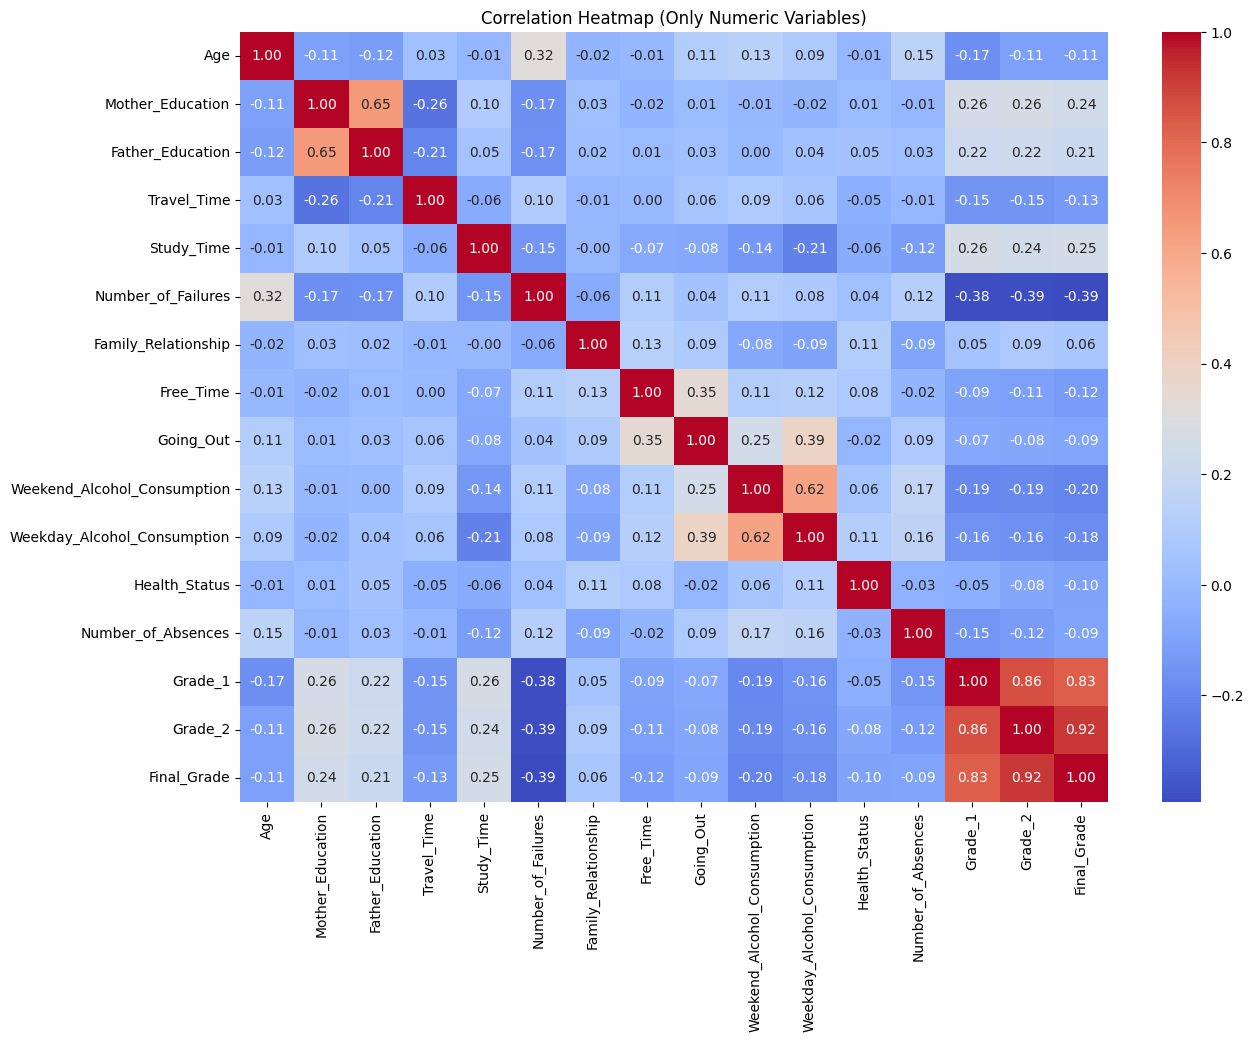

In [7]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Only Numeric Variables)")
plt.show()


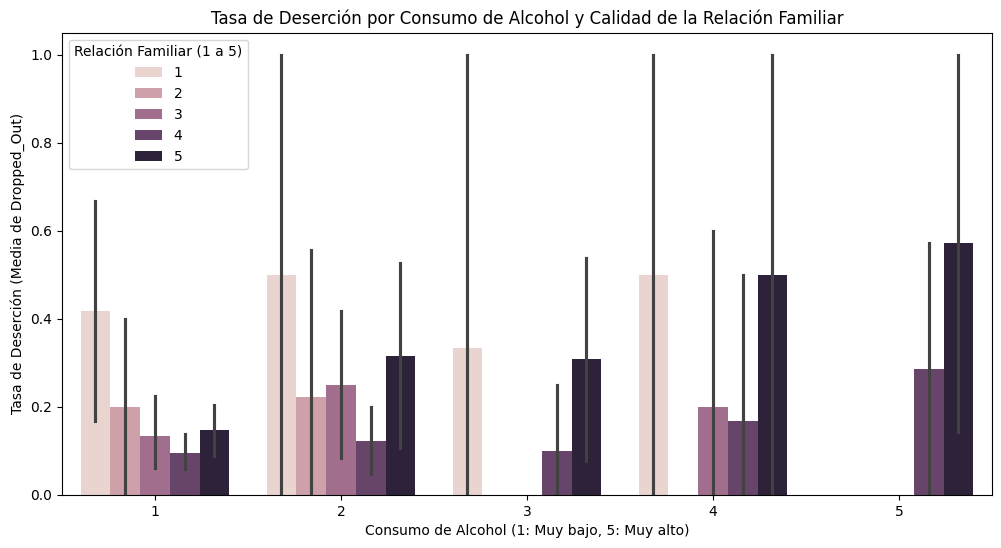

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekend_Alcohol_Consumption', y='Dropped_Out_int', hue='Family_Relationship', data=df)
plt.title('Tasa de Deserción por Consumo de Alcohol y Calidad de la Relación Familiar')
plt.xlabel('Consumo de Alcohol (1: Muy bajo, 5: Muy alto)')
plt.ylabel('Tasa de Deserción (Media de Dropped_Out)')
plt.legend(title='Relación Familiar (1 a 5)')
plt.show()

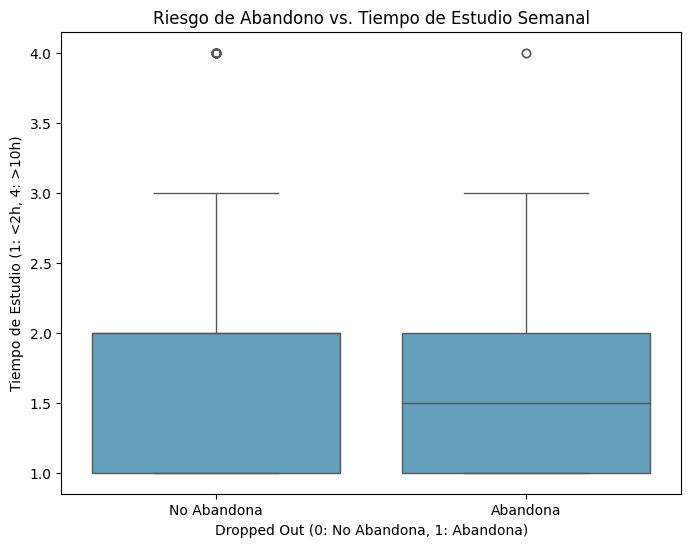

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dropped_Out', y='Study_Time', data=df)
plt.title('Riesgo de Abandono vs. Tiempo de Estudio Semanal')
plt.xlabel('Dropped Out (0: No Abandona, 1: Abandona)')
plt.ylabel('Tiempo de Estudio (1: <2h, 4: >10h)')
plt.xticks([0, 1], ['No Abandona', 'Abandona'])
plt.show()


1. Distribución de la Nota Final
Un histograma de la nota final (Final_Grade) muestra la distribución general del rendimiento académico.

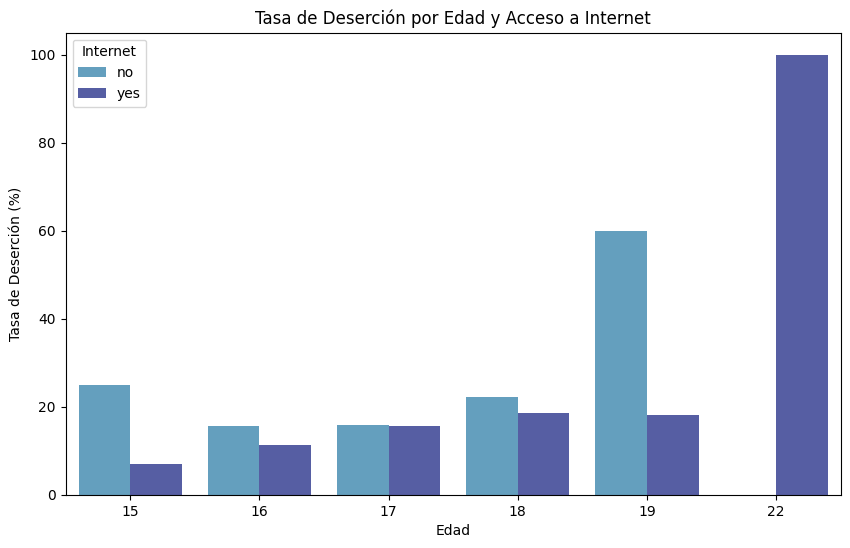

In [10]:
internet_age_dropout = df.groupby(['Internet_Access', 'Age'])['Dropped_Out'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
dropout_rate_only = internet_age_dropout[internet_age_dropout['Dropped_Out'] == True]
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Percentage', hue='Internet_Access', data=dropout_rate_only)
plt.title('Tasa de Deserción por Edad y Acceso a Internet')
plt.xlabel('Edad')
plt.ylabel('Tasa de Deserción (%)')
plt.legend(title='Internet')
plt.show()

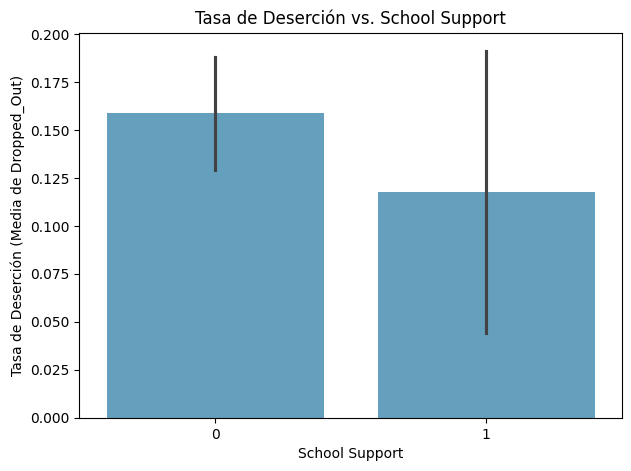

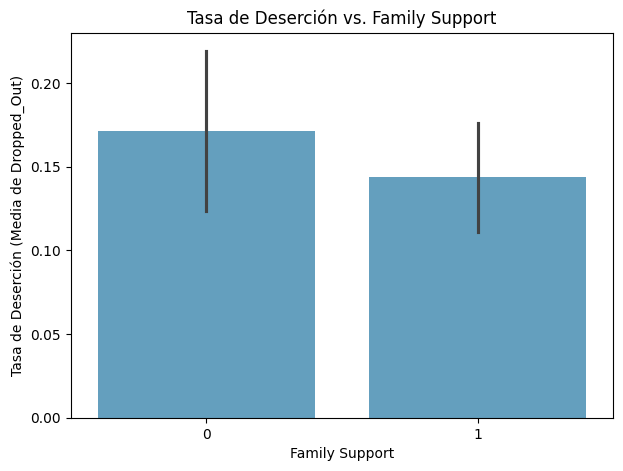

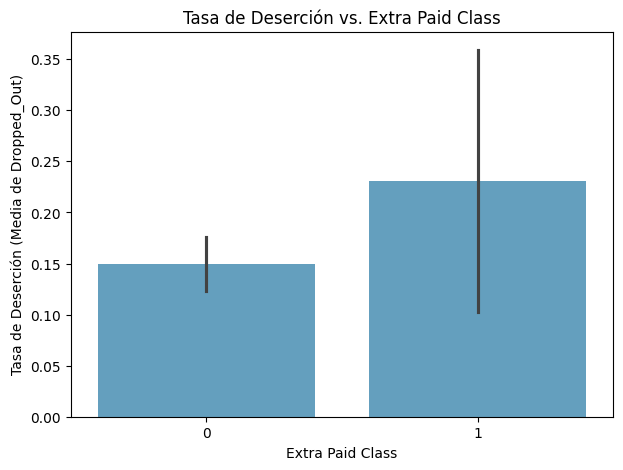

In [36]:
support_cols = ['School_Support', 'Family_Support', 'Extra_Paid_Class']
for i, col in enumerate(support_cols):
    plt.figure(figsize=(7, 5))
    sns.barplot(x=col, y='Dropped_Out', data=df)
    plt.title(f'Tasa de Deserción vs. {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Tasa de Deserción (Media de Dropped_Out)')
    plt.show()

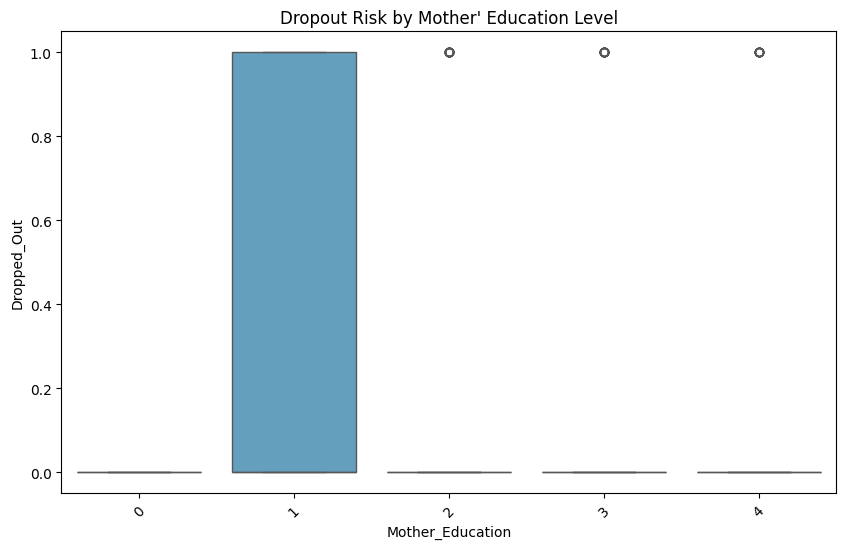

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Mother_Education", y="Dropped_Out")
plt.title("Dropout Risk by Mother' Education Level")
plt.xticks(rotation=45)
plt.show()


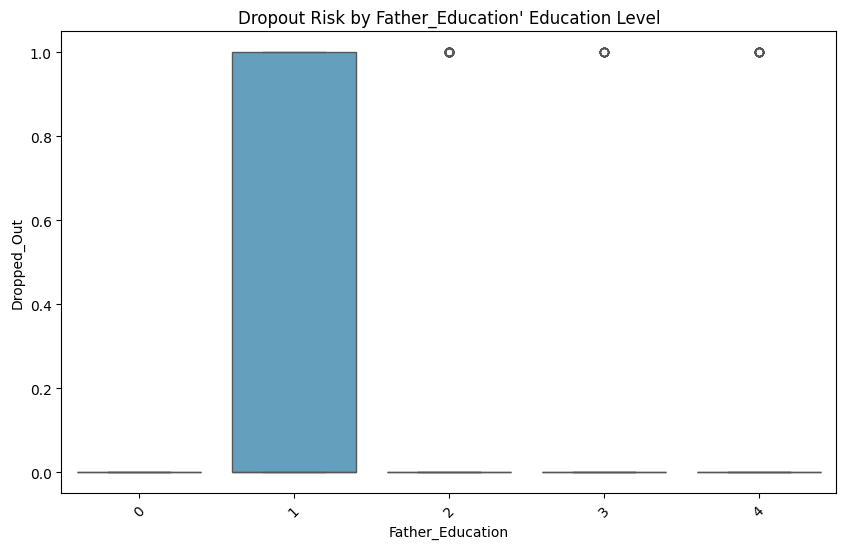

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Father_Education", y="Dropped_Out")
plt.title("Dropout Risk by Father_Education' Education Level")
plt.xticks(rotation=45)
plt.show()


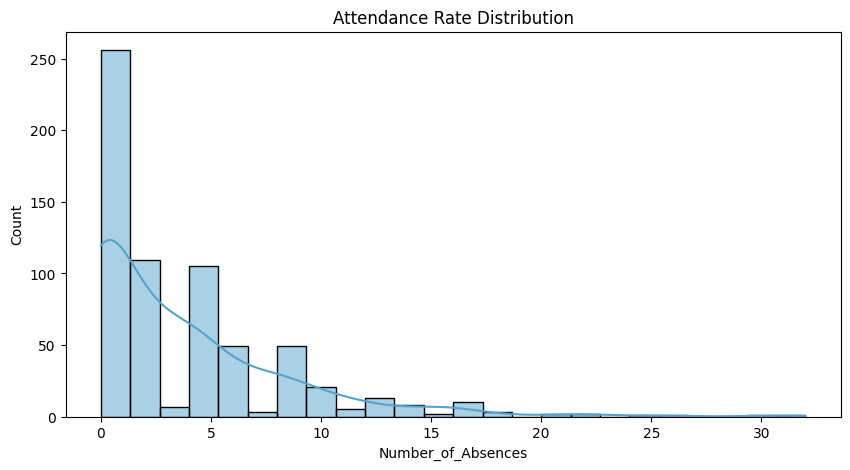

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Number_of_Absences"], kde=True)
plt.title("Attendance Rate Distribution")
plt.show()


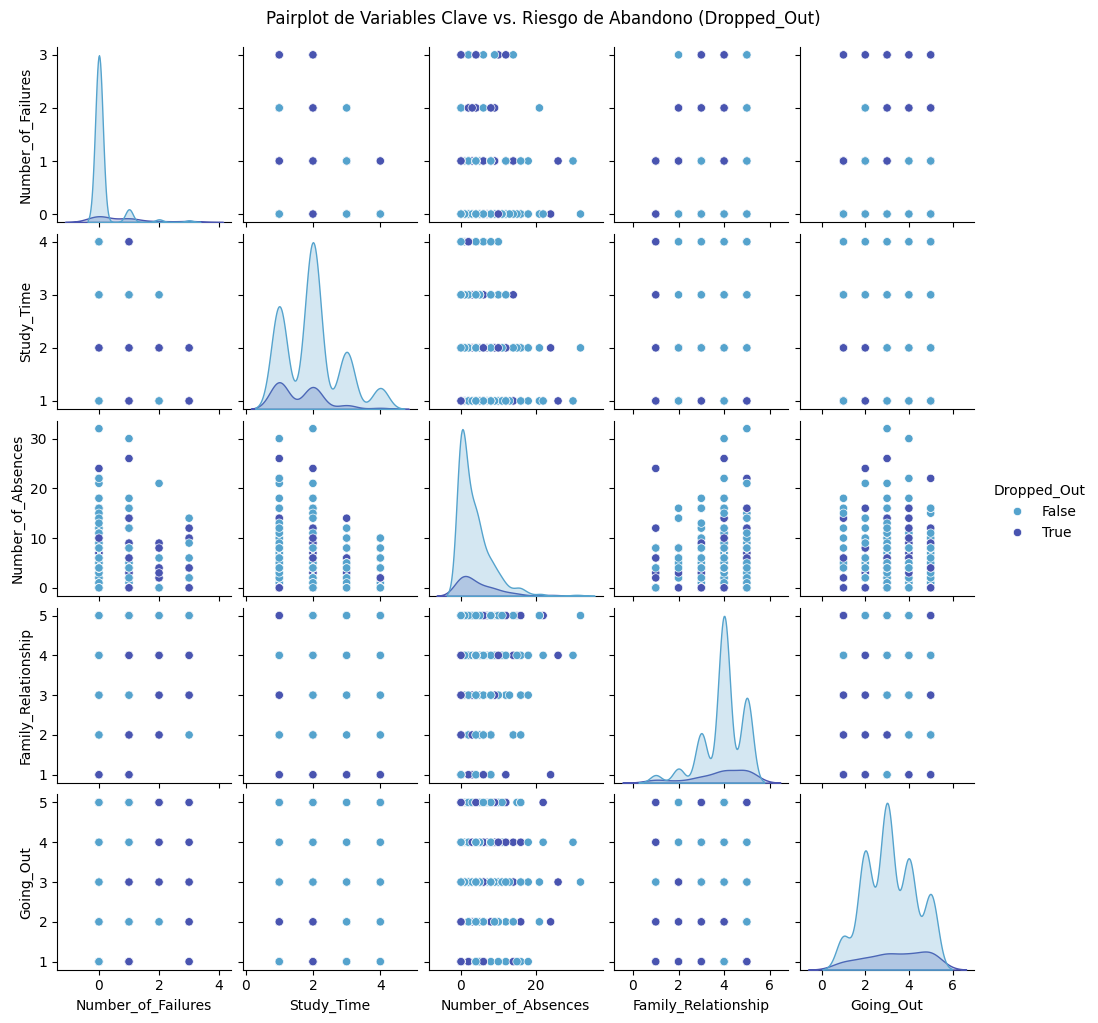

In [38]:
sns.pairplot(df[[
    'Number_of_Failures',
    'Study_Time',
    'Number_of_Absences',
    'Family_Relationship',
    'Going_Out',
    'Dropped_Out'
]], hue='Dropped_Out', diag_kind='kde', height=2)
plt.suptitle('Pairplot de Variables Clave vs. Riesgo de Abandono (Dropped_Out)', y=1.02)
plt.show()

#### Let's analyze each variable distribution (except for car and model)

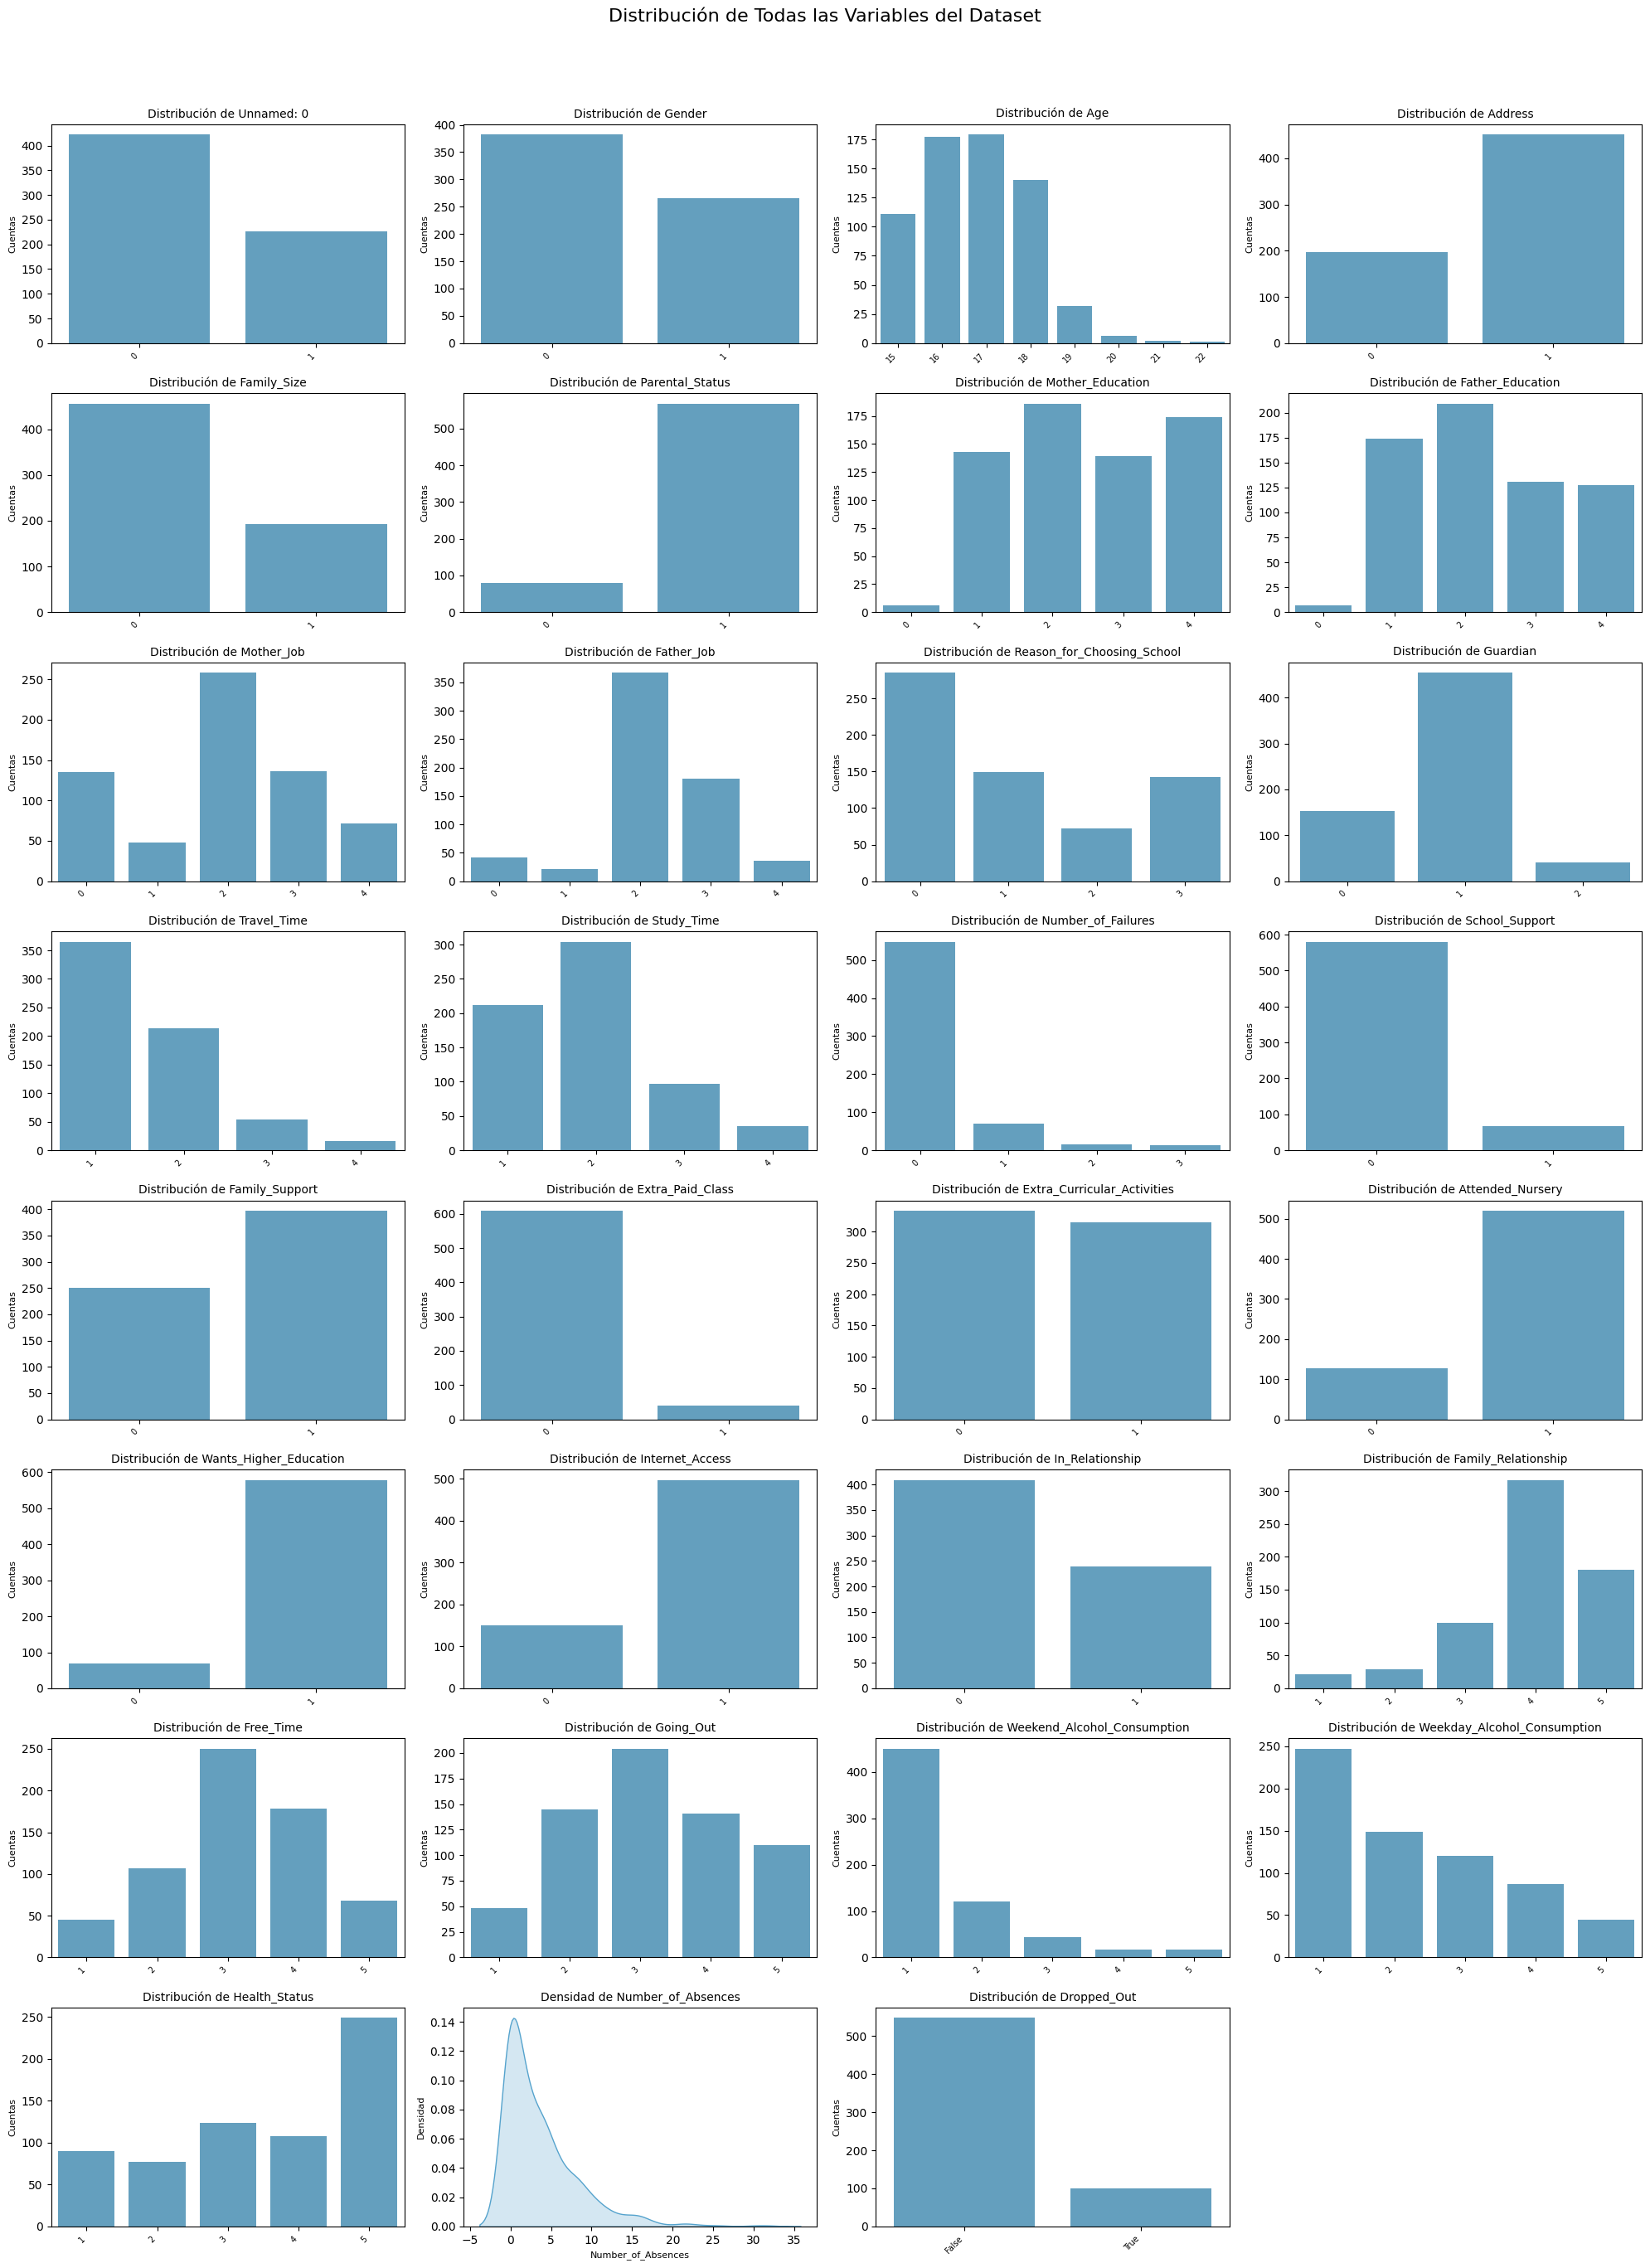

In [39]:
plot_types = {}
columns = df.columns 

for col in columns:
    if df[col].dtype == 'object': 
        plot_types[col] = 'bar'
    elif df[col].dtype == 'bool':
        plot_types[col] = 'bar'
    else:
        unique_values = df[col].nunique()

        if unique_values < 10:
            plot_types[col] = 'bar'
        else:
            plot_types[col] = 'kde'

# Usaremos 4 columnas para mejor distribución
n_cols = 4
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3.5)) 
axes = axes.flatten()

# Crear cada plot
for i, col in enumerate(columns):
    ax = axes[i]
    
    if plot_types[col] == 'bar':
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(f'Distribución de {col}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Cuentas', fontsize=8)
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=7)

    else:
        sns.kdeplot(df[col], ax=ax, fill=True)
        ax.set_title(f'Densidad de {col}', fontsize=10)
        ax.set_xlabel(col, fontsize=8)
        ax.set_ylabel('Densidad', fontsize=8)

# Ocultar subplots vacíos
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

fig.suptitle('Distribución de Todas las Variables del Dataset', fontsize=16, y=1.005)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

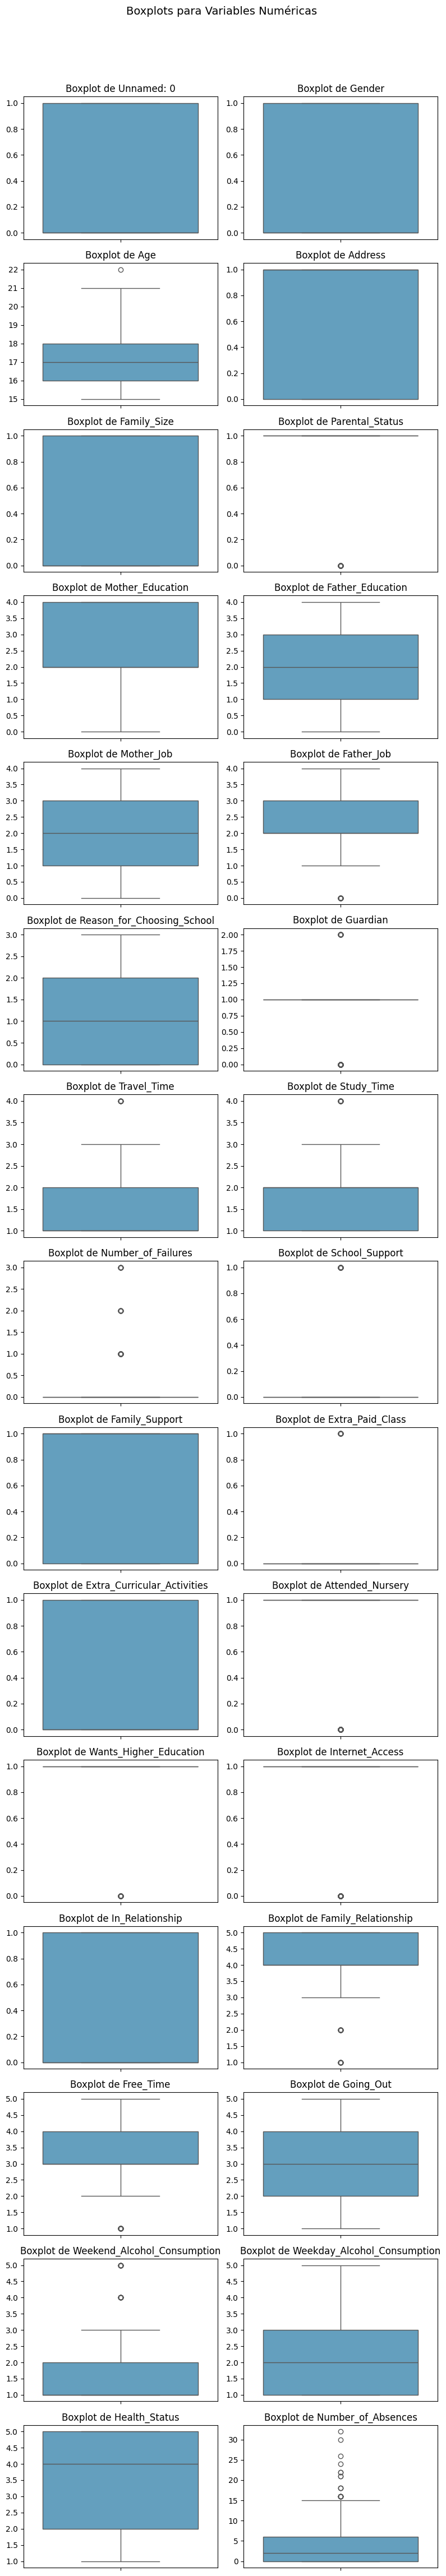

In [41]:
numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ocultar los subplots sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots para Variables Numéricas", fontsize=14, y=1.02)
fig.tight_layout()
plt.show()

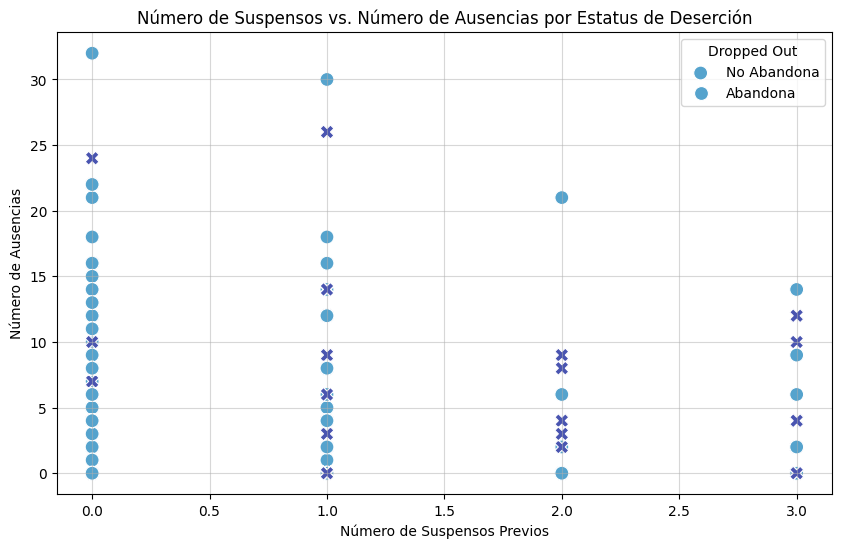

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Number_of_Failures',
    y='Number_of_Absences',
    hue='Dropped_Out', 
    data=df,
    style='Dropped_Out',
    s=100
)
plt.title('Número de Suspensos vs. Número de Ausencias por Estatus de Deserción')
plt.xlabel('Número de Suspensos Previos')
plt.ylabel('Número de Ausencias')
plt.legend(title='Dropped Out', labels=['No Abandona', 'Abandona'])
plt.grid(axis='both', alpha=0.5)
plt.show()

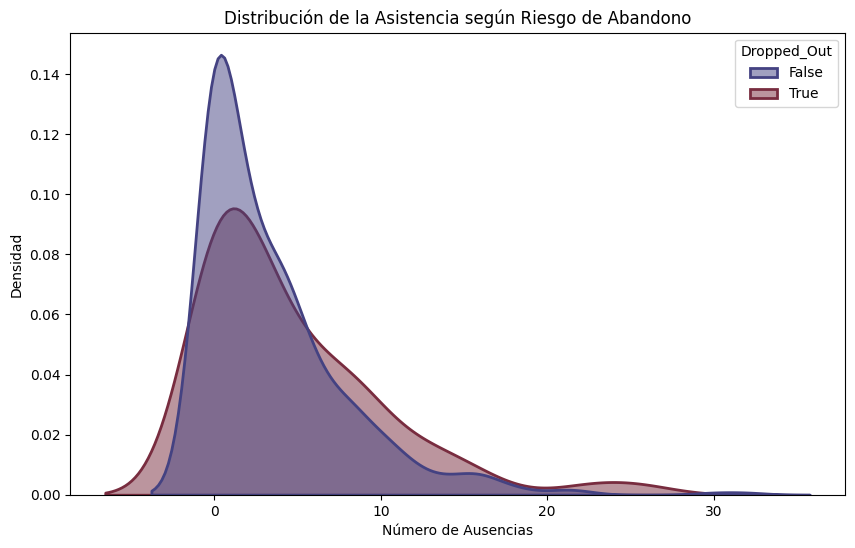

In [47]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df, 
    x="Number_of_Absences", 
    hue="Dropped_Out", 
    fill=True, 
    common_norm=False, 
    palette="icefire",
    alpha=0.5,
    linewidth=2
)

plt.title("Distribución de la Asistencia según Riesgo de Abandono")
plt.xlabel("Número de Ausencias")
plt.ylabel("Densidad")
plt.show()

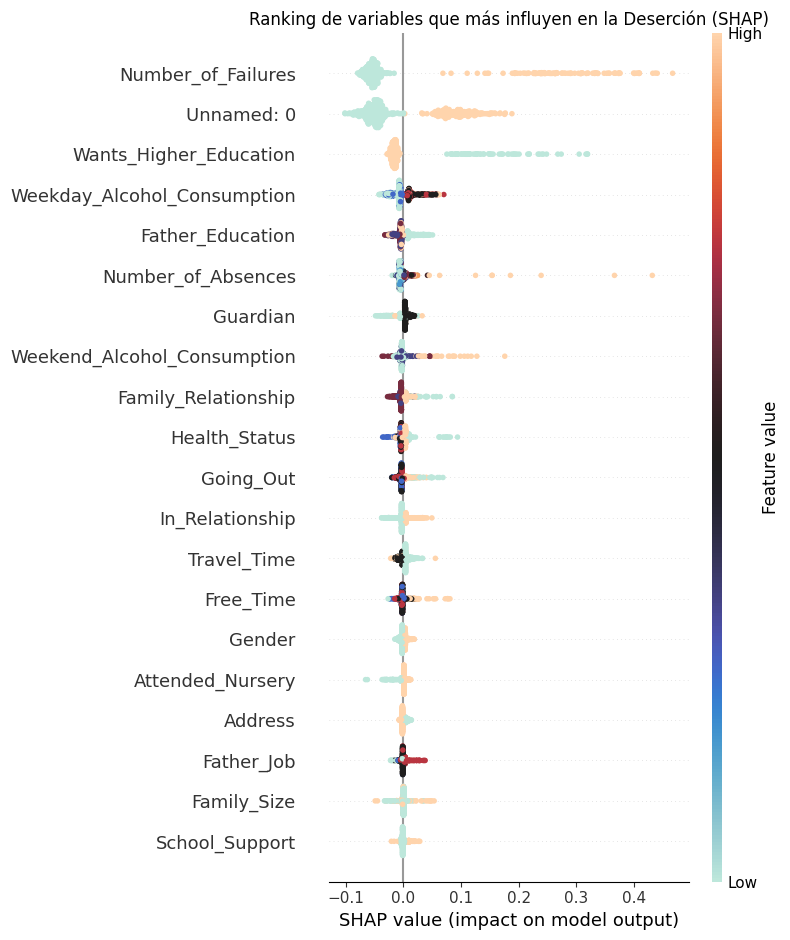

In [48]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import shap

df_encoded = df.copy()
df_encoded['Dropped_Out'] = df_encoded['Dropped_Out'].astype(int)

le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

X = df_encoded.drop(['Dropped_Out', 'Dropped_Out_int'], axis=1, errors='ignore')
y = df_encoded['Dropped_Out'] 

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

fig = plt.figure(figsize=(10, 8))
plt.title("Ranking de variables que más influyen en la Deserción (SHAP)")
shap.summary_plot(shap_values, X, plot_type="dot", show=False, cmap="icefire")

plt.tight_layout()
plt.show(fig)

#### Let's analyze each variable behaviour with respect to the target (price)

**Solution:** 

### Let's prepare the data for model:

In [21]:
df_original = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   648 non-null    object 
 1   Gender                       648 non-null    object 
 2   Age                          648 non-null    int64  
 3   Address                      648 non-null    object 
 4   Family_Size                  648 non-null    object 
 5   Parental_Status              648 non-null    object 
 6   Mother_Education             648 non-null    int64  
 7   Father_Education             648 non-null    int64  
 8   Mother_Job                   648 non-null    object 
 9   Father_Job                   648 non-null    object 
 10  Reason_for_Choosing_School   648 non-null    object 
 11  Guardian                     648 non-null    object 
 12  Travel_Time                  648 non-null    int64  
 13  Study_Time               

In [22]:
# Crear un diccionario para guardar los codificadores
encoders = {}

# Seleccionar solo columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
    print(f"* {col}: {df[col].unique()}")


* Unnamed: 0: [0 1]
* Gender: [0 1]
* Address: [1 0]
* Family_Size: [0 1]
* Parental_Status: [0 1]
* Mother_Job: [0 1 2 3 4]
* Father_Job: [4 2 3 1 0]
* Reason_for_Choosing_School: [0 2 1 3]
* Guardian: [1 0 2]
* School_Support: [1 0]
* Family_Support: [0 1]
* Extra_Paid_Class: [0 1]
* Extra_Curricular_Activities: [0 1]
* Attended_Nursery: [1 0]
* Wants_Higher_Education: [1 0]
* Internet_Access: [0 1]
* In_Relationship: [0 1]


In [23]:
# Lista de valores que significan "sí"
yes_list = ['yes', 'YES', 'Yes', 'y', 'Y']

# Detectar todas las columnas tipo object
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterar sobre las columnas
for col in categorical_columns:
    # Verificar si la columna contiene valores tipo yes/no
    if df[col].str.lower().isin(['yes','no']).any() or df[col].isin(yes_list).any():
        df[col] = np.where(df[col].isin(yes_list), 1, 0)
        print(f'Columna "{col}" convertida a binaria.')


In [24]:
df = df.drop(columns=['Final_Grade', "Grade_1","Grade_2"])


#### EX6: Now that all data is in numeric data type, Plot the correlation matrix among features:

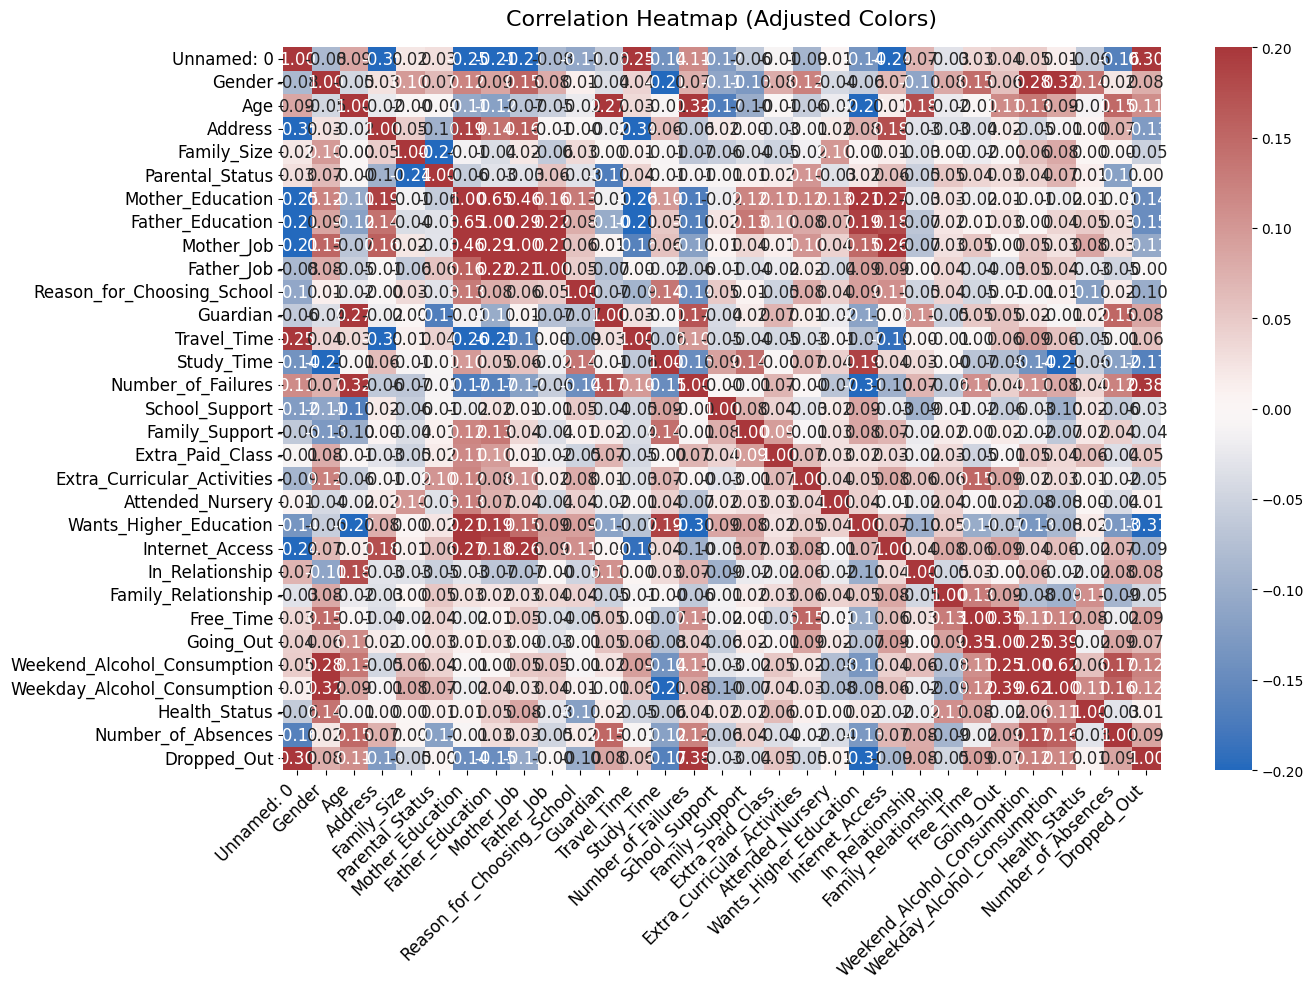

In [25]:

corr = df.corr()

# Ajustar límites según los valores reales
vmin = -0.2
vmax = 0.2

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(
    corr, 
    vmin=vmin, vmax=vmax, 
    annot=True, 
    fmt=".2f",
    cmap='vlag',          # colormap más sutil para valores pequeños
    center=0,             # centra el color en 0
    annot_kws={"size":12}
)

heatmap.set_title('Correlation Heatmap (Adjusted Colors)', fontdict={'fontsize':16}, pad=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


#### EX7: Which variables are more correlated with the target?

**Solution:**

## Model training

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   648 non-null    int64
 1   Gender                       648 non-null    int64
 2   Age                          648 non-null    int64
 3   Address                      648 non-null    int64
 4   Family_Size                  648 non-null    int64
 5   Parental_Status              648 non-null    int64
 6   Mother_Education             648 non-null    int64
 7   Father_Education             648 non-null    int64
 8   Mother_Job                   648 non-null    int64
 9   Father_Job                   648 non-null    int64
 10  Reason_for_Choosing_School   648 non-null    int64
 11  Guardian                     648 non-null    int64
 12  Travel_Time                  648 non-null    int64
 13  Study_Time                   648 non-null    int64
 14 

In [27]:
# Variable objetivo
target = "Dropped_Out"

# Features (todas las demás columnas excepto la target)
X = df.drop(columns=[target])
y = df[target]

# División train/test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Revisar shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (518, 30)
X_test shape: (130, 30)
y_train shape: (518,)
y_test shape: (130,)


#### Ensure X and Y have the same lenght for both train and test

In [28]:
print("Lenght X_train:",len(X_train))
print("Length y_train:", len(y_train))
print("Lenght X_test:",len(X_test))
print("Length y_test:", len(y_test))

Lenght X_train: 518
Length y_train: 518
Lenght X_test: 130
Length y_test: 130


#### Try different models:

In [29]:
#Linear Regression:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
display(linear_reg)

y_pred_test = linear_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


$0.35


In [30]:
#Random Forest:

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)
display(random_forest_reg)

y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


$0.38


In [31]:
#XGBoost:

lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit (X_train, y_train)
display(lgb_reg)

y_pred_test=lgb_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

LightGBMError: Do not support special JSON characters in feature name.

#### it seems that LightGBM performs better for this use case, so let's continue with the this algorithm grid search for choosing the best parameters (this can take some minutes):

In [ ]:
# Add as many parametrers as you want
max_depth = [2, 8, 12]
n_estimators = [50, 100, 300]
learning_rate = [0.1]

parameters = {
    "max_depth": max_depth,
    "n_estimators": n_estimators,
    "learning_rate": learning_rate}

lgb_reg = lgb.LGBMRegressor(random_state=42, force_row_wise=True)

# Grid Search
gs = GridSearchCV(lgb_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 30
[LightGBM] [Info] Start training from score 0.168675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,estimator,LGBMRegressor...ndom_state=42)
,param_grid,"{'learning_rate': [0.1], 'max_depth': [2, 8, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [ ]:
lgb_reg = gs.best_estimator_
lgb_reg.fit(X_train, y_train)

y_pred_test = lgb_reg.predict(X_test)

error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

print("The R2_score is:", r2_score(y_test, y_pred_test))

[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 30
[LightGBM] [Info] Start training from score 0.163776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
# -----------------------------
# CLASSIFICACIÓ a partir del model de regressió
# -----------------------------
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
threshold = 0.5  # Pots ajustar-lo

# Convertim prediccions a classes
y_pred_class = (y_pred_test >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Matriu de confusió
cm = confusion_matrix(y_test_class, y_pred_class)
TN, FP, FN, TP = cm.ravel()

print("\nConfusion Matrix:")
print(cm)

print("\n--- Classification Metrics ---")
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)


Confusion Matrix:
[[111   4]
 [ 10   5]]

--- Classification Metrics ---
True Negatives (TN): 111
False Positives (FP): 4
False Negatives (FN): 10
True Positives (TP): 5


#### EX8: Test with an invented example (just run the code and answer the questions):

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   School                       649 non-null    int64
 1   Gender                       649 non-null    int64
 2   Age                          649 non-null    int64
 3   Address                      649 non-null    int64
 4   Family_Size                  649 non-null    int64
 5   Parental_Status              649 non-null    int64
 6   Mother_Education             649 non-null    int64
 7   Father_Education             649 non-null    int64
 8   Mother_Job                   649 non-null    int64
 9   Father_Job                   649 non-null    int64
 10  Reason_for_Choosing_School   649 non-null    int64
 11  Guardian                     649 non-null    int64
 12  Travel_Time                  649 non-null    int64
 13  Study_Time                   649 non-null    int64

In [ ]:
# 1. Columnes del model (mateix ordre que entrenament)
#    TOTES menys 'Dropped_Out' (que és la variable objectiu)
feature_cols = [
    'School',
    'Gender',
    'Age',
    'Address',
    'Family_Size',
    'Parental_Status',
    'Mother_Education',
    'Father_Education',
    'Mother_Job',
    'Father_Job',
    'Reason_for_Choosing_School',
    'Guardian',
    'Travel_Time',
    'Study_Time',
    'Number_of_Failures',
    'School_Support',
    'Family_Support',
    'Extra_Paid_Class',
    'Extra_Curricular_Activities',
    'Attended_Nursery',
    'Wants_Higher_Education',
    'Internet_Access',
    'In_Relationship',
    'Family_Relationship',
    'Free_Time',
    'Going_Out',
    'Weekend_Alcohol_Consumption',
    'Weekday_Alcohol_Consumption',
    'Health_Status',
    'Number_of_Absences'
]

# 2. Columnes que PREGUNTAREM a l'usuari
#    (pots canviar aquesta llista si vols altres variables)
asked_cols = [
    'Gender',
    'Age',
    'Family_Size',
    'Parental_Status',
    'Study_Time',
    'Number_of_Failures',
    'Number_of_Absences',
    'Free_Time'
]

# 3. Valors típics (mediana) per a TOTES les columnes del model
typical_values = {col: df[col].median() for col in feature_cols}

# 4. Funció auxiliar: demana un número i, si es deixa en blanc o és invàlid, usa la mediana
def ask_numeric(col_name, prompt_text):
    raw = input(prompt_text).strip()
    if raw == "":
        val = typical_values[col_name]
        print(f" → buit, faig servir la mediana de '{col_name}': {val}")
        return float(val)
    try:
        return float(raw)
    except ValueError:
        val = typical_values[col_name]
        print(f" → valor no vàlid per a '{col_name}', faig servir la mediana: {val}")
        return float(val)

# 5. Preguntar només les variables d'asked_cols
user_answers = {}

user_answers['Gender'] = ask_numeric('Gender', "Introdueix el codi de Gender (p.ex. 0/1): ")
user_answers['Age'] = ask_numeric('Age', "Introdueix l'edat: ")
user_answers['Family_Size'] = ask_numeric('Family_Size', "Mida de la família: ")
user_answers['Parental_Status'] = ask_numeric('Parental_Status', "Codi Parental_Status: ")
user_answers['Study_Time'] = ask_numeric('Study_Time', "Study_Time (hores/setmana): ")
user_answers['Number_of_Failures'] = ask_numeric('Number_of_Failures', "Nombre de suspensos previs: ")
user_answers['Number_of_Absences'] = ask_numeric('Number_of_Absences', "Nombre d'absències: ")
user_answers['Free_Time'] = ask_numeric('Free_Time', "Temps lliure (escala del dataset): ")

print("Your answers:", user_answers)

# 6. Construir el vector complet d'entrada per al model:
input_data = {}
for col in feature_cols:
    if col in asked_cols:
        input_data[col] = user_answers[col]
    else:
        input_data[col] = float(typical_values[col])

# 7. DataFrame final amb una sola fila, en el mateix ordre que feature_cols
X_user = pd.DataFrame([[input_data[col] for col in feature_cols]], columns=feature_cols)

print("\nVector d'entrada al model:")
print(X_user)

 → buit, faig servir la mediana de 'Gender': 0.0
 → buit, faig servir la mediana de 'Age': 17.0
 → buit, faig servir la mediana de 'Family_Size': 0.0
 → buit, faig servir la mediana de 'Parental_Status': 1.0
 → buit, faig servir la mediana de 'Study_Time': 2.0
 → buit, faig servir la mediana de 'Number_of_Failures': 0.0
 → buit, faig servir la mediana de 'Number_of_Absences': 2.0
 → buit, faig servir la mediana de 'Free_Time': 3.0
Your answers: {'Gender': 0.0, 'Age': 17.0, 'Family_Size': 0.0, 'Parental_Status': 1.0, 'Study_Time': 2.0, 'Number_of_Failures': 0.0, 'Number_of_Absences': 2.0, 'Free_Time': 3.0}

Vector d'entrada al model:
   School  Gender   Age  Address  Family_Size  Parental_Status  \
0     0.0     0.0  17.0      1.0          0.0              1.0   

   Mother_Education  Father_Education  Mother_Job  Father_Job  ...  \
0               2.0               2.0         2.0         2.0  ...   

   Wants_Higher_Education  Internet_Access  In_Relationship  \
0                     

In [ ]:
# 6. Construir el vector de features en l'ordre correcte
try:
    sample_list = []

    for col in feature_cols:
        if col in asked_cols:
            # Valor donat (o imputat) per l'usuari
            # user_answers[col] ja és numèric gràcies a ask_numeric
            val = float(user_answers[col])
            sample_list.append(val)
        else:
            # No es pregunta: agafem la mediana del dataset
            sample_list.append(float(typical_values[col]))

    X_sample = np.array([sample_list])
    print("X_sample shape:", X_sample.shape)  # ha de ser (1, len(feature_cols))
    print("X_sample:", X_sample)

    # 7. Predicció amb el model (mantenint el nom del model establert)
    y_pred = lgb_reg.predict(X_sample)
    print(f"\nPredicted dropout risk: {y_pred[0]:.3f}")

except ValueError as e:
    print("\nERROR de transformació:", e)
    print("Revisa que els valors introduïts siguin numèrics (o deixa en blanc per usar la mediana).")


X_sample shape: (1, 30)
X_sample: [[ 0.  0. 17.  1.  0.  1.  2.  2.  2.  2.  1.  1.  1.  2.  0.  0.  1.  0.
   0.  1.  1.  1.  0.  4.  3.  3.  1.  2.  4.  2.]]

Predicted dropout risk: 0.003


In [ ]:
y_pred_sample = lgb_reg.predict(X_sample)
print("Your estimated dropout risk is: ","${:,.05f}".format(y_pred_sample[0]))

Your estimated dropout risk is:  $0.00315


### Store and read the model

In [ ]:
# Store
data = {
    "model": lgb_reg,     # Model entrenat
    "feature_cols": [
        'School',
        'Gender',
        'Age',
        'Address',
        'Family_Size',
        'Parental_Status',
        'Mother_Education',
        'Father_Education',
        'Mother_Job',
        'Father_Job',
        'Reason_for_Choosing_School',
        'Guardian',
        'Travel_Time',
        'Study_Time',
        'Number_of_Failures',
        'School_Support',
        'Family_Support',
        'Extra_Paid_Class',
        'Extra_Curricular_Activities',
        'Attended_Nursery',
        'Wants_Higher_Education',
        'Internet_Access',
        'In_Relationship',
        'Family_Relationship',
        'Free_Time',
        'Going_Out',
        'Weekend_Alcohol_Consumption',
        'Weekday_Alcohol_Consumption',
        'Health_Status',
        'Number_of_Absences'
    ]
}

with open('dropout_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
# Read
with open('dropout_model.pkl', 'rb') as file:
    data = pickle.load(file)

model = data["model"]
encoders = data["encoders"]
feature_cols = data["feature_cols"]

# Predicció
y_pred_sample = model.predict(X_sample)
print("Predicted dropout risk:", round(y_pred_sample[0], 3))

KeyError: 'encoders'

## Explainability AI

As an excellent data scientist, we cannot conclude our work without understanding how the model works. In this section of the project, we will apply SHAP as a technique to understand, debug and explain our model.

### Global explainability

#### EX9: Train a Shap explainer and calculate the shap_values object for the X_test dataset. Print the shap values object of the first sample of X_test.

In [ ]:
# CODE HERE

import shap
shap.initjs()
explainer = shap.Explainer(lgb_reg, X_train)
shap_values = explainer(X_test)

display(X_test)
print(shap_values[0])

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences
636,1,1,18,1,0,1,4,4,4,4,...,1,1,0,3,2,4,1,4,2,4
220,0,0,16,1,0,0,3,1,3,2,...,1,1,0,2,3,3,2,2,4,2
594,1,0,18,1,0,1,4,4,4,4,...,1,1,0,4,3,5,1,2,1,0
429,1,1,16,0,1,0,4,4,0,2,...,1,0,0,5,3,2,1,3,2,5
72,0,0,15,0,0,1,1,1,2,2,...,1,1,1,3,3,4,2,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1,0,16,1,0,1,3,2,3,0,...,1,1,0,3,1,3,1,4,3,2
374,0,0,17,1,0,1,3,1,3,3,...,1,1,0,3,4,3,2,3,5,0
444,1,1,16,0,0,1,3,4,2,1,...,1,0,0,3,4,5,1,2,5,4
244,0,0,17,1,1,1,4,3,1,2,...,1,1,1,3,2,3,1,2,3,0


.values =
array([ 0.09076185,  0.00616125,  0.00084055,  0.        ,  0.00208451,
        0.        ,  0.        , -0.01016072,  0.00179364,  0.00532038,
        0.00155072, -0.02960749,  0.00989786, -0.00225095, -0.05683722,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.02517823, -0.00229828,  0.00131391,  0.00236562, -0.00775104,
       -0.00424799, -0.00268457,  0.00570919, -0.0140784 , -0.00204137])

.base_values =
np.float64(0.18459671480160897)

.data =
array([ 1,  1, 18,  1,  0,  1,  4,  4,  4,  4,  1,  0,  1,  2,  0,  0,  0,
        0,  1,  0,  1,  1,  0,  3,  2,  4,  1,  4,  2,  4])


#### EX10: Which is the average price cost prediction for all cars?

**Solution:**

#### Let's plot the summary plot and bar plot for global explainability of the model.

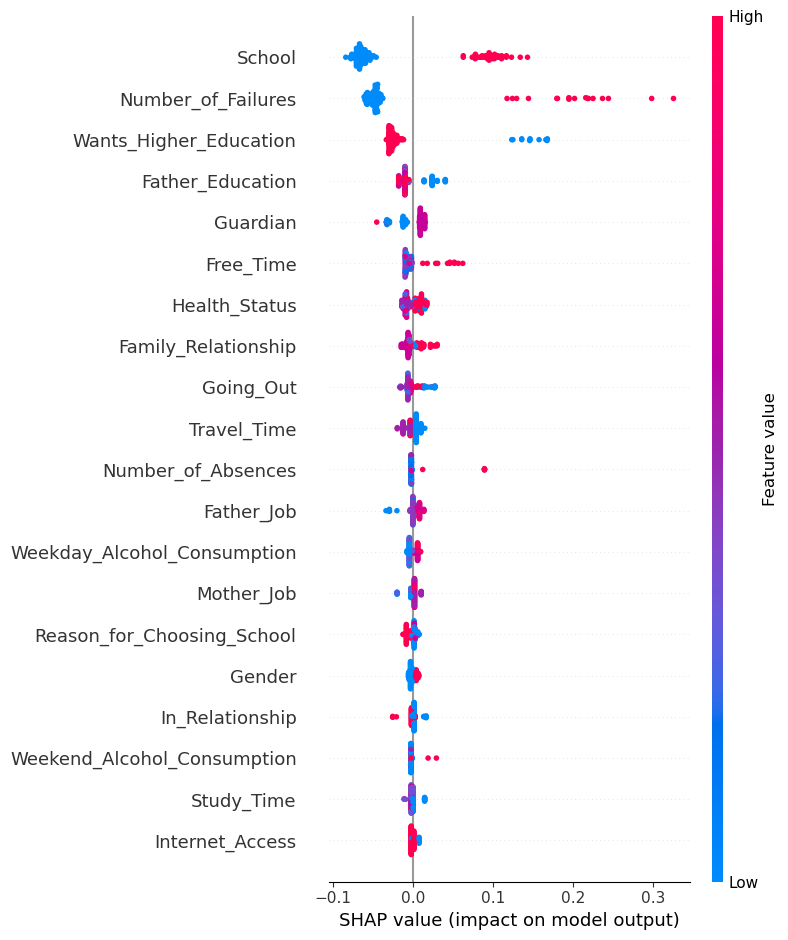

In [ ]:
#Global Explainability
shap.summary_plot(shap_values, X_test)

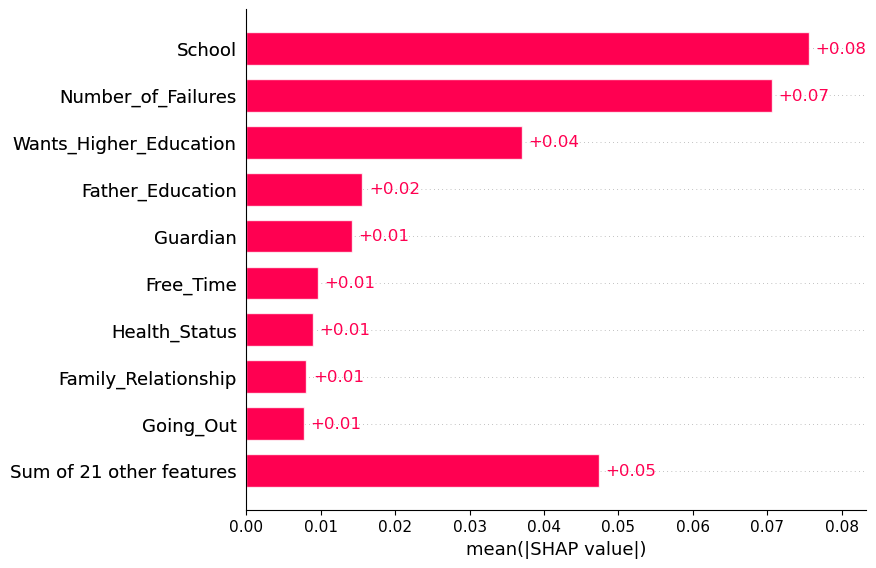

In [ ]:
#Plot var: built from column 1 of all shap_values
shap.plots.bar(shap_values)

#### EX11: Which are your insights?

**Solution:**

#### Let's do deep dive in the variables `Mileage`, `engV` and `year`. 

In [ ]:
#shap.plots.scatter(shap_values[:,"GPA"])

In [ ]:
#shap.plots.scatter(shap_values[:,"Mental_Health_Score"])

In [ ]:
#shap.plots.scatter(shap_values[:,"Courses_Failed"])

#### EX12: What are the most relevant insights abour the evolution of the features' values and their Shap values.

#### **Solution:**

#### Let's analyze the relationship of the variables `engV` and `year` and their Shap values according to the value of `mileage`.

In [ ]:
#Let's analyze the evolution of Shap values of engV based on mileage
#shap.dependence_plot("engV", shap_values.values, X_test, interaction_index= "mileage")

In [ ]:
#Let's analyze the evolution of Shap values of engV based on mileage
#shap.dependence_plot("year", shap_values.values, X_test, interaction_index= "mileage")

 #### EX13: What are the most relevant insights about the evolution of the features' values and their Shap values.

**Solution:**

### Local explainability

Local explainability facilitates the understanding of the prediction for some particular cases. In other words, XAI closes to a personalized prediction explainability. Let's use the first sample of X_test for the following steps.

#### Using the waterfall, force and decision plots, we can explain how the model works.

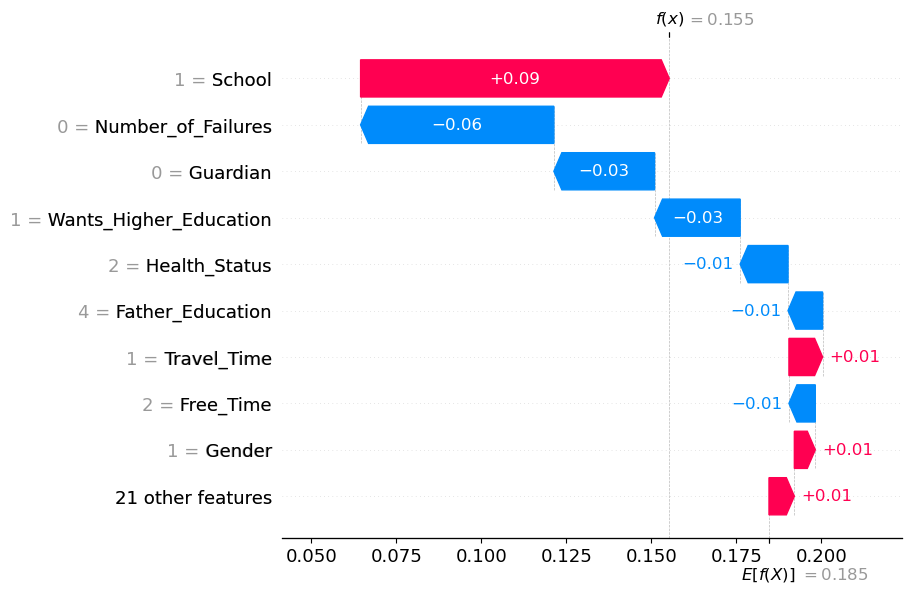

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.force(shap_values[0])

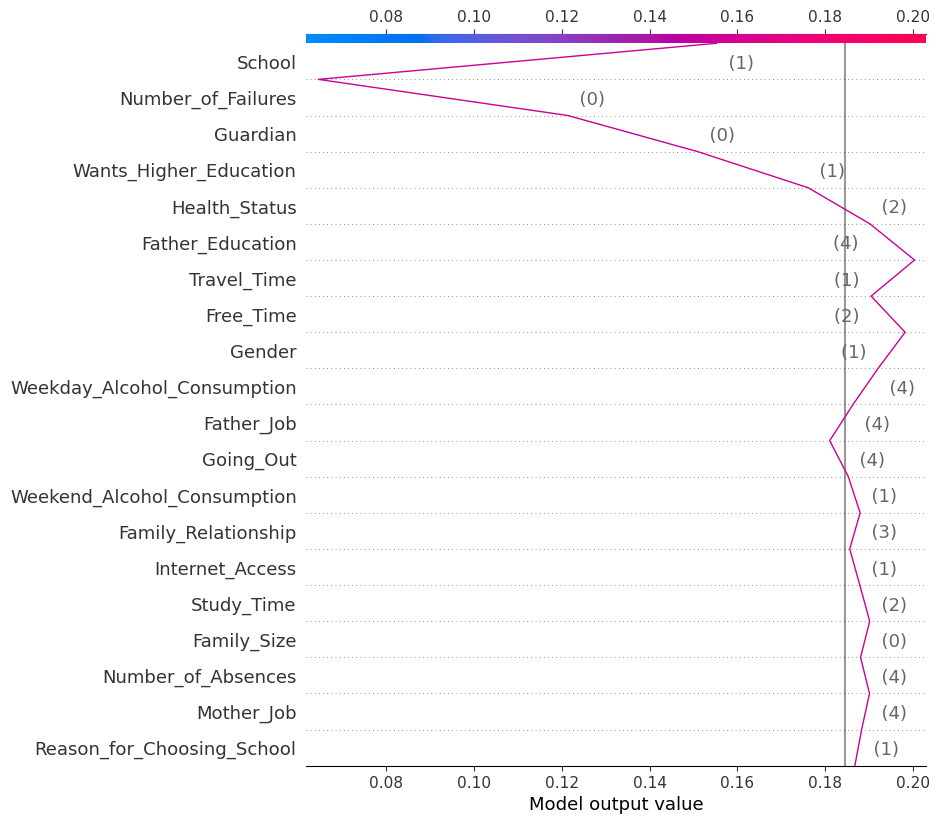

In [ ]:
shap.decision_plot(shap_values[0].base_values,shap_values[0].values, X_test.iloc[0])